<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#imageio" data-toc-modified-id="imageio-1">imageio</a></span></li><li><span><a href="#matplotlib-again" data-toc-modified-id="matplotlib-again-2">matplotlib again</a></span></li><li><span><a href="#Images-as-arrays" data-toc-modified-id="Images-as-arrays-3">Images as arrays</a></span><ul class="toc-item"><li><span><a href="#RGB" data-toc-modified-id="RGB-3.1">RGB</a></span><ul class="toc-item"><li><span><a href="#Manipulating-colors" data-toc-modified-id="Manipulating-colors-3.1.1">Manipulating colors</a></span></li></ul></li><li><span><a href="#uint8" data-toc-modified-id="uint8-3.2">uint8</a></span></li></ul></li></ul></div>

In [1]:
import os

def cleanup():
    for fileformat in ['jpg', 'png']:
        try:
            os.remove('new_image.' + fileformat)
        except FileNotFoundError:
            pass

os.chdir('examples')
cleanup()

# Images

In this lesson, we will learn a bit about how computers represent images, and how we can use Python to manipulate image files.

Before you start reading, it may be an interesting exercise to think about how a computer might store an image. As we learned in the [lesson on files](files.ipynb#encodings), in order to store information computers require some system for converting that information into numbers. How might an image be converted into numbers?

As it turns out, there are a few different ways of turning an image into numbers. We will focus on the most common of these. To find out what it is, let's simply load an image into Python and explore the result. Take a look at the example image file [street_scene.jpg](examples/data/street_scene.jpg). This is the image that it contains:

![](examples/data/street_scene.jpg)

## imageio

There are a few ways to load image files into Python, but the `imageio` [package](extras/glossary.ipynb#package) provides the simplest. (The 'io' in `imageio` stands for [input/output](extras/glossary.ipynb#io).)

Like all the additional Python packages that we have used so far, `imageio` is included in the default Anaconda installation, so if you installed Anaconda then you will already have it.

The `imread()` function reads an image file. The input [argument](extras/glossary.ipynb#argument) to `imread()` is the [path](extras/glossary.ipynb#path) to the file. As usual, we [assign](extras/glossary.ipynb#assignment) the result into a variable so that we can work with it in the rest of our program:

In [2]:
import os
import imageio

filepath = os.path.join('data', 'street_scene.jpg')
img = imageio.imread(filepath)

## matplotlib again

After loading our image, it is a good idea to check that it has been read correctly. We can do this by displaying the image in a figure, using the `pyplot` module from `matplotlib`, which we learned about in the [lesson on arrays](arrays.ipynb#matplotlib). The function for displaying an image is `imshow()`:

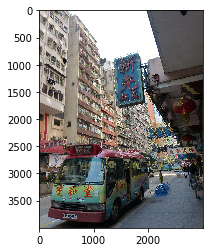

In [3]:
from matplotlib import pyplot

pyplot.imshow(img)
pyplot.show()

It looks right. The `matplotlib` figure also helpfully adds axis scales, so we can see the dimensions of our image here as well. It appears to be about 3000 pixels wide and 4000 pixels high.

As we learn how to manipulate our image, we can keep returning to `imshow()` to check the results.

## Images as arrays

Now let's find out what form our image takes in Python. What sort of [return value](extras/glossary.ipynb#return) did `imread()` give us?

The first thing we can do to find out is print the image variable:

In [4]:
print(img)

[[[217 208 209]
  [216 207 208]
  [215 206 207]
  ...
  [ 76  71  75]
  [ 82  77  81]
  [ 85  79  83]]

 [[217 208 209]
  [216 207 208]
  [216 207 208]
  ...
  [ 77  72  76]
  [ 82  77  81]
  [ 84  78  82]]

 [[217 209 207]
  [217 209 207]
  [218 210 208]
  ...
  [ 79  74  78]
  [ 83  78  82]
  [ 84  78  82]]

 ...

 [[171 163 117]
  [168 161 117]
  [162 155 113]
  ...
  [ 69  75  87]
  [ 72  76  88]
  [ 75  78  93]]

 [[162 157 115]
  [159 154 112]
  [154 149 111]
  ...
  [ 69  75  87]
  [ 71  75  87]
  [ 75  78  93]]

 [[149 144 104]
  [148 145 104]
  [147 143 106]
  ...
  [ 68  75  85]
  [ 72  76  88]
  [ 76  79  94]]]


This looks a lot like an [array](extras/glossary.ipynb#array). And indeed it is; our image has been turned into an array. Quite a big one (the occurrences of '...' in the printed output indicate that some of the contents have been omitted so that the printout is of a manageable size).

Let's check its [type](extras/glossary.ipynb#type) just to be sure:

In [5]:
type(img)

imageio.core.util.Array

We are told that it is an `imageio` array rather than a `numpy` array, but this distinction need not concern us. `imaegio`'s array type is a variation on `numpy`'s, and everything that we learned about `numpy` arrays in the [lesson on arrays](arrays.ipynb) also applies to our image array.

For example, the image array has a `shape` [attribute](extras/glossary.ipynb#attribute):

In [6]:
img.shape

(4000, 3000, 3)

What does the `shape` attribute tell us about our image array?

First of all, we can see from the fact that `shape` contains three numbers that the array has three dimensions. This does not mean that our image is a 3D image; it is a normal 'flat' 2D image. Let's see what each of the dimensions of the array refers to.

The first two dimensions are easy to understand. We can think of these as rows and columns, just as in a [matrix](extras/glossary.ipynb#matrix). Remembering Python's convention for ordering the dimensions of an array, we can see that our image array has 4000 rows and 3000 columns. If you take a look at the image file in your file explorer and call up its properties, you will see that these two numbers match the height and width of the image in pixels. So together the first two dimensions represent the image as a matrix of pixels.

Array indices count rows downwards from the top and count columns from left to right. So if we ask for the first row and the first column (using array [indices](extras/glossary.ipynb#index) as we learned in [the previous lesson](arrays.ipynb#indexing)), we get the top left pixel:

In [7]:
print(img[0, 0])

[217 208 209]


### RGB

The three numbers that we see here are the three values along the remaining dimension of the array. For mental visualization, it can help to think of the third dimension as representing 'layers', so that the image is composed of three matrices of pixels, stacked one on top of the other.

Each of these three layers represents one color, and the image is made up of the [additive mixture](https://en.wikipedia.org/wiki/Additive_color) of these three color layers. The most common system for representing color mixtures in computing is with the three primary colors red, green, and blue, in that order. These mix together in the same way that you probably learned about at school:

* red + green -> yellow
* red + blue -> pinkish purple (magenta)
* green + blue -> greenish blue (cyan)
* red + green + blue -> white

Here is a fun [home-made video](https://upload.wikimedia.org/wikipedia/commons/transcoded/3/3d/Additive_colors.ogv/Additive_colors.ogv.480p.vp9.webm) demonstrating additive color mixing.

A sequence of three numbers representing a color as a mixture of red, green, and blue is known as an [RGB](extras/glossary.ipynb#rgb) value. So the three layers of our image array are a red layer, a green layer, and a blue layer. And the three numbers that we saw in the top left pixel above are the 'amounts' of red, green, and blue in the color of this single pixel. What scale are these numbers on? Most commonly, RGB values are integers on a scale from 0 to 255, where larger numbers represent more of a particular color, and therefore a brighter color. Other color scales are possible, but this one is the most common and the one that is used in our image array.

So what color is the top left pixel of our image? It contains approximately equal amounts of all three colors, which should produce a neutral gray. And those amounts are fairly close to the maximum value of 255, so the gray should be a fairly bright one. Looking back at the image, this matches what we see; the top left of the image contains the facade of a light gray concrete building.

We can see that the top right of the image contains a rather darker gray, so we should expect lower values here. Let's check our understanding by fetching this pixel (remember that negative [indices](extras/glossary.ipynb#index) count back from the end):

In [8]:
print(img[0, -1])

[85 79 83]


If you want to experiment with RGB values to find out what sorts of colors result from different combinations, you can create your own small image arrays using `numpy` and then show the result with `imshow()`. The `numpy` function `full()` is useful for creating arrays of a given shape that are full of the same value. The first input argument is the desired shape, and the second if the value to fill the array with.

For example, we can use `full()` to create a small image array of 10 by 10 pixels in which all pixels are black:

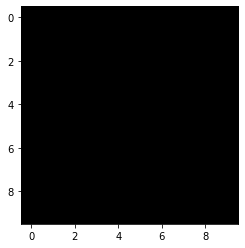

In [9]:
import numpy

color_test = numpy.full((10, 10, 3), 0)
pyplot.imshow(color_test)
pyplot.show()

And now to try out other colors, we can use [array indexing](arrays.ipynb#indexing) to change the values in one or more of the color layers in our new image array. For example to see what the combination of red and green looks like, we can set the first two color layers (R and G) to the maximum value of `255`:

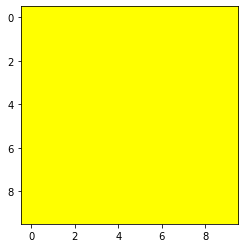

In [10]:
color_test[:, :, 0:2] = 255
pyplot.imshow(color_test)
pyplot.show()

#### Manipulating colors

We can use our understanding of RGB values to manipulate the colors of our example image.

This will involve changing the values in the image array. To avoid having to load the image from the file again every time we want to start afresh, we can begin each new manipulation by making a copy of the image array, so that the original remains unchanged. `numpy` arrays have a `copy()` [method](extras/glossary.ipynb#method) for this:

In [11]:
img_mod = img.copy()

Now we can work with the copy. Let's try first 'turning off' the red and green color layers by setting all their values to `0`. This should result in an image that contains only shades of blue:

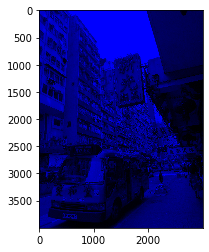

In [12]:
img_mod[:, :, 0:2] = 0

pyplot.imshow(img_mod)
pyplot.show()

Turning one color layer up to maximum while leaving the other layers unchanged instead results in a 'tint':

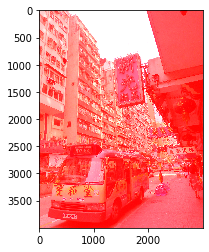

In [13]:
img_mod = img.copy()

img_mod[:, :, 0] = 255

pyplot.imshow(img_mod)
pyplot.show()

And changing a subset of rows or columns instead of asking for all of them (with `:`) applies the color change to only some of the pixels:

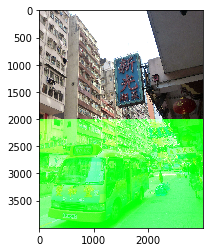

In [14]:
img_mod = img.copy()

img_mod[-2000:, :, 1] = 255

pyplot.imshow(img_mod)
pyplot.show()

You get the general idea. Now would be a good moment to head over to the Spyder console, load the image yourself if you haven't already, and try out some more manipulations to test your understanding.

### uint8

Like a `numpy` array, an `imageio` array has a `dtype` [attribute](extras/glossary#attribute). If you have been paying attention to the outputs that we printed above, you will have noticed that the values in our image array are integers (note the absence of a decimal point). Let's check the array's `dtype` to be sure:

In [15]:
img.dtype

dtype('uint8')

The values in the image array are of [type](extras/glossary.ipynb#type) 'uint8' rather than just 'int'. They are still integers, but of a special restricted kind. The `uint8` type is a new one that comes from `numpy` rather than from basic Python.

To illustrate the special behavior of this type, let's create a small `numpy` array, and specifically request that its `dtype` be `uint8`:

In [16]:
x = numpy.array([[1, 2], [3, 4]], dtype=numpy.uint8)

If we print our new array, its values look just like normal integers. And if we do some basic math with them, they also appear to behave normally:

In [17]:
print(x)

[[1 2]
 [3 4]]


In [18]:
print(x + 1)

[[2 3]
 [4 5]]


In [19]:
print(x * 2)

[[2 4]
 [6 8]]


However, the `uint8` type has two special characteristics that make it different from a standard Python `int`.

First, the 'u' in 'uint8' stands for 'unsigned'. A `uint8` number has no sign, i.e. it cannot be negative. If we do something with an array of `uint8` values that would make some of those values negative, the result is not as expected:

In [20]:
print(x - 5)

[[252 253]
 [254 255]]


To understand why `4 - 5` appears to result in `255`, consider the second special characteristic of `uint8`. The '8' at the end stands for '8-bit', and refers to the representation of the integers in the computer's memory as sequences of 'on/off' 'bits', which is ultimately how all numbers are represented in a computer. The computer stores `uint8` numbers using only 8 such bits for each number. As it turns out, 255 is the largest number that can be represented as a combination of 8 bits. Since each bit has two possible values (either 'on' or 'off'), the number of possible combinations of ons and offs among 8 bits is $2^8$:

In [21]:
2 ** 8

256

(If you are wondering why the largest possible number is only 255 when the number of possible combinations is 256, remember that the number 0 is among the possible numbers as well.)

Unsigned 8-bit integers are a decent choice for representing the color values of an image. 8 bits is a small amount of computer memory, so the image can be stored compactly, and 256 possible values for each of the three color layers still results in a large range of possible overall colors:

In [22]:
256 ** 3

16777216

So `uint8` values cannot become negative and cannot go above 255. If we perform mathematical operations with an array of `uint8` values such that they go beyond this range, they are 'wrapped around' to the other end of the range. This is why `4 - 5` became `255`. Likewise, `1 + 255` becomes `0`:

In [23]:
print(x + 255)

[[0 1]
 [2 3]]


In practical terms, what this means for us is that we should be careful when doing math with image arrays. If a math operation could take the values outside the range 0 to 255, then the results might be unexpected.

One other common problem arises if we accidentally convert the values in the image array to a different type. As we learned way back in the [lesson on types](types.ipynb), division always results in a [float](extras/glossary.ipynb#float). So if we try to divide values, for example in an attempt to darken the image by making all color values less bright, the resulting array's `dtype` will be float:

In [24]:
img2 = img / 2

img2.dtype

dtype('float64')

And `imshow()` by default interprets arrays of floats in an entirely different way to integers, so the resulting image does not look right at all (though we at least get a warning message telling us that there are invalid values in the array):

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


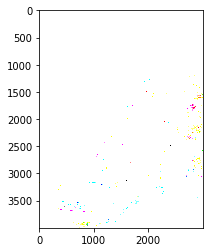

In [25]:
pyplot.imshow(img2)
pyplot.show()

To darken the image correctly, we can use integer division (`//`) instead:

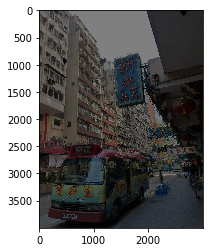

In [26]:
pyplot.imshow(img // 2)
pyplot.show()

In [27]:
cleanup()